### A "Thin" Application of Time Series

Google Trends allows users to see how often a term is searched for. We downloaded a file from Google Trends containing the frequency over time for the search word "diet", which is pre-loaded in a DataFrame called diet. A first step when analyzing a time series is to visualize the data with a plot. You should be able to clearly see a gradual decrease in searches for "diet" throughout the calendar year, hitting a low around the December holidays, followed by a spike in searches around the new year as people make New Year's resolutions to lose weight.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
diet = pd.read_csv('Datasets/diet.csv', index_col=0)
diet.head()

,diet
Date,
6/26/2011,70
7/3/2011,71
7/10/2011,73
7/17/2011,74
7/24/2011,72


In [4]:
# Convert the date index to datetime
diet.index = pd.to_datetime(diet.index)

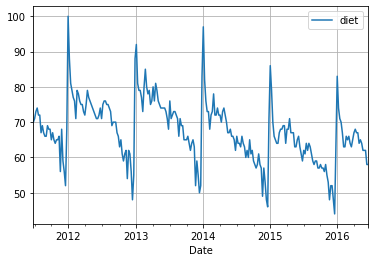

In [5]:
# Plot the entire time series diet and show gridlines
diet.plot(grid=True)
plt.show()

In [6]:
# Slice the dataset to keep only 2012
diet2012 = diet['2012']

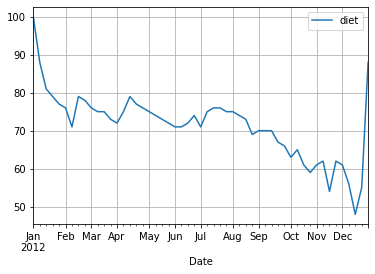

In [7]:
# Plot 2012 data
diet2012.plot(grid=True)
plt.show()

### Merging Time Series With Different Dates
Stock and bond markets in the U.S. are closed on different days. For example, although the bond market is closed on Columbus Day (around Oct 12) and Veterans Day (around Nov 11), the stock market is open on those days. One way to see the dates that the stock market is open and the bond market is closed is to convert both indexes of dates into sets and take the difference in sets.

The pandas .join() method is a convenient tool to merge the stock and bond DataFrames on dates when both markets are open.

Stock prices and 10-year US Government bond yields, which were downloaded from FRED, are pre-loaded in DataFrames stocks and bonds.

In [8]:
stocks = pd.read_csv('Datasets/stocks.csv', index_col = 0)
bonds = pd.read_csv('Datasets/bonds.csv', index_col = 0)

In [9]:
# Convert the date index to datetime
stocks.index = pd.to_datetime(stocks.index)
bonds.index = pd.to_datetime(bonds.index)

In [10]:
# Convert the stock index and bond index into sets
set_stock_dates = set(stocks.index)
set_bond_dates = set(bonds.index)

In [11]:
len(set_bond_dates), len(set_stock_dates)

(2503, 2519)

In [12]:
# Take the difference between the sets and print
print(set_stock_dates - set_bond_dates)

{Timestamp('2014-10-13 00:00:00'), Timestamp('2009-10-12 00:00:00'), Timestamp('2010-11-11 00:00:00'), Timestamp('2008-11-11 00:00:00'), Timestamp('2013-10-14 00:00:00'), Timestamp('2012-11-12 00:00:00'), Timestamp('2010-10-11 00:00:00'), Timestamp('2013-11-11 00:00:00'), Timestamp('2007-10-08 00:00:00'), Timestamp('2016-11-11 00:00:00'), Timestamp('2007-11-12 00:00:00'), Timestamp('2017-06-09 00:00:00'), Timestamp('2014-11-11 00:00:00'), Timestamp('2011-11-11 00:00:00'), Timestamp('2015-11-11 00:00:00'), Timestamp('2016-10-10 00:00:00'), Timestamp('2015-10-12 00:00:00'), Timestamp('2008-10-13 00:00:00'), Timestamp('2009-11-11 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2011-10-10 00:00:00')}


In [13]:
# Merge stocks and bonds DataFrames using join()
stocks_and_bonds = stocks.join(bonds, how='inner')

### Correlation of Stocks and Bonds
Investors are often interested in the correlation between the returns of two different assets for asset allocation and hedging purposes. In this exercise, you'll try to answer the question of whether stocks are positively or negatively correlated with bonds. Scatter plots are also useful for visualizing the correlation between the two variables.

Keep in mind that you should compute the correlations on the percentage changes rather than the levels.

Stock prices and 10-year bond yields are combined in a DataFrame called stocks_and_bonds under columns SP500 and US10Y

In [14]:
stocks_and_bonds.head()

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


In [15]:
# Compute percent change using pct_change()
returns = stocks_and_bonds.pct_change()

In [16]:
returns

,SP500,US10Y
observation_date,,
2007-06-11,NaN,NaN
2007-06-12,-0.010682,0.023346
2007-06-13,0.015184,-0.011407
2007-06-14,0.004816,0.005769
2007-06-15,0.006527,-0.013384
...,...,...
2017-06-02,0.003708,-0.027149
2017-06-05,-0.001218,0.013953
2017-06-06,-0.002779,-0.018349


In [17]:
# Compute correlation using corr()
correlation = returns['SP500'].corr(returns['US10Y'])
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:  0.411944888624927


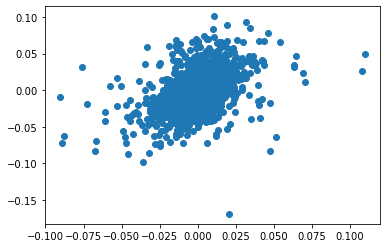

In [18]:
# Make scatter plot
plt.scatter(returns['SP500'], returns['US10Y'])
plt.show()

The positive correlation means that when interest rates go down, stock prices go down. For example, during crises like 9/11, investors sold stocks and moved their money to less risky bonds (this is sometimes referred to as a 'flight to quality'). During these periods, stocks drop and interest rates drop as well. Of course, there are times when the opposite relationship holds too.

### Flying Saucers Aren't Correlated to Flying Markets
Two trending series may show a strong correlation even if they are completely unrelated. This is referred to as "spurious correlation". That's why when you look at the correlation of say, two stocks, you should look at the correlation of their returns and not their levels.

To illustrate this point, calculate the correlation between the levels of the stock market and the annual sightings of UFOs. Both of those time series have trended up over the last several decades, and the correlation of their levels is very high. Then calculate the correlation of their percent changes. This will be close to zero, since there is no relationship between those two series.

In [19]:
DJI = pd.read_csv('Datasets/DJI.csv', index_col = 0)
UFO = pd.read_csv('Datasets/UFO.csv', index_col = 0)

In [20]:
DJI.columns = ['DJI']
UFO.columns = ['UFO']

In [21]:
levels = DJI.join(UFO, how='inner')

In [22]:
levels.head()

,DJI,UFO
Date,,
1941,110.96,1
1942,119.40,2
1943,135.89,9
1944,152.32,9
1945,192.91,9


In [23]:
levels_main = pd.read_csv('Datasets/levels.csv')
levels_main

,Date,DJI,UFO
0,1941,110.96,1
1,1942,119.40,2
2,1943,135.89,9
3,1944,152.32,9
4,1945,192.91,9
...,...,...,...
68,2009,10428.05,4541
69,2010,11577.51,4283
70,2011,12217.56,5107
71,2012,13104.14,7357


In [24]:
levels.tail()

,DJI,UFO
Date,,
2009,10428.05,4541
2010,11577.51,4283
2011,12217.56,5107
2012,13104.14,7357
2013,16576.66,7037


In [25]:
# Compute Correlation of levels
correlation1 = levels['DJI'].corr(levels['UFO'])
print(f"Correlation of Levels: {correlation1}")

Correlation of Levels: 0.9399762210726432


In [26]:
# Compute correlation of percent changes
changes = levels.pct_change()
correlation2 = changes['DJI'].corr(changes['UFO'])
print("Correlation of changes: ", correlation2)

Correlation of changes:  0.06026935462405376


 Notice that the correlation on levels is high but the correlation on changes is close to zero.

### Looking at a Regression's R-Squared
R-squared measures how closely the data fit the regression line, so the R-squared in a simple regression is related to the correlation between the two variables. In particular, the magnitude of the correlation is the square root of the R-squared and the sign of the correlation is the sign of the regression coefficient.

In this exercise, you will start using the statistical package statsmodels, which performs much of the statistical modeling and testing that is found in R and software packages like SAS and MATLAB.

You will take two series, x and y, compute their correlation, and then regress y on x using the function OLS(y,x) in the statsmodels.api library (note that the dependent, or right-hand side variable y is the first argument). Most linear regressions contain a constant term which is the intercept (the  in the regression 
). To include a constant using the function OLS(), you need to add a column of 1's to the right hand side of the regression.

The module statsmodels.api has been imported for you as sm.

In [27]:
import numpy as np

In [40]:
x = pd.read_csv('Datasets/x.csv', header=None, index_col=0, names=['x'])
y = pd.read_csv('Datasets/y.csv', header=None, index_col=0, names=['y'])

In [42]:
# Import the statsmodels module
import statsmodels.api as sm

# Compute correlation of x and y
correlation = x['x'].corr(y['y'])
print("The correlation between x and y is %4.2f" %(correlation))

# Convert the Series x to a DataFrame and name the column x
dfx = pd.DataFrame(x, columns=['x'])

# Add a constant to the DataFrame dfx
dfx1 = sm.add_constant(dfx)

# Regress y on dfx1
result = sm.OLS(y,dfx1).fit()

# Print out the results and look at the relationship between R-squared and the correlation above
print(result.summary())

The correlation between x and y is -0.90
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        19:54:14   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      